In [ ]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 25.7 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import numpy as np
import tensorflow as tf
import cv2

from IPython.display import clear_output,display
from IPython.display import Image
import matplotlib.pyplot as plt

from keras import Model, Input
from keras.layers import Dense

In [ ]:
env=gym.make('CartPole-v1',render_mode='rgb_array')

In [ ]:
#sstate is a batch ,a tensor of size [1,4]
def policy(state,epsilon=0.0):
  action=tf.argmax(q_net(state)[0],output_type=tf.int32)
  if tf.random.uniform(shape=(),minval=0,maxval=1)<=epsilon:
    action=tf.random.uniform(shape=(),minval=0,maxval=2,dtype=tf.int32)
  return action

In [ ]:
#Q-Network
#input layer of shape 4 cuz our observation is a vector of 4 elements
net_input = Input(shape=(4,))
# define a fully connnected layer of 64 neuron
x=Dense(64,activation="relu")(net_input)
x= Dense(32,activation="linear")(x)
output=Dense(2,activation="linear")(x)
q_net=Model(inputs=net_input,outputs=output)

#PARAMETERS
alpha=0.001
epsilon=1.0
epsilon_decay=1.001
gamma=0.09
episodes=500

for episode in range(episodes):
  done=False
  total_reward=0
  ep_len=0
  observation,_ = env.reset()  # Returns a dictionary
  state = tf.convert_to_tensor([observation])

  while not done:
    action =policy(state,epsilon)
    next_state,reward,terminated,truncated,info=env.step(action.numpy())
    done=terminated or truncated
    next_state=tf.convert_to_tensor([next_state])
    next_action=policy(next_state)
    #calculate target
    #target Q value
    target=reward+gamma*q_net(next_state)[0][next_action]
    if done:
      target=reward
    #predicted q-values
    with tf.GradientTape() as tape:
      current=q_net(state)
    #gradient of current wrt to tarinable weights
    grads=tape.gradient(current,q_net.trainable_weights)
    #error
    delta=target-current[0][action]
    #update weights
    for j in range(len(grads)):
      q_net.trainable_weights[j].assign_add(alpha*delta*grads[j])

    state=next_state
    action=next_action

    total_reward+=reward
    ep_len+=1
  epsilon/=epsilon_decay
  print(f"Episode: {episode+1}, Total Reward: {total_reward}, Episode Length: {ep_len} Epsilon: {epsilon}")
env.close()

Episode: 1, Total Reward: 15.0, Episode Length: 15 Epsilon: 0.9990009990009991
Episode: 2, Total Reward: 17.0, Episode Length: 17 Epsilon: 0.9980029960049943
Episode: 3, Total Reward: 29.0, Episode Length: 29 Epsilon: 0.9970059900149795
Episode: 4, Total Reward: 17.0, Episode Length: 17 Epsilon: 0.9960099800349447
Episode: 5, Total Reward: 21.0, Episode Length: 21 Epsilon: 0.9950149650698749
Episode: 6, Total Reward: 17.0, Episode Length: 17 Epsilon: 0.9940209441257493
Episode: 7, Total Reward: 15.0, Episode Length: 15 Epsilon: 0.9930279162095398
Episode: 8, Total Reward: 25.0, Episode Length: 25 Epsilon: 0.9920358803292106
Episode: 9, Total Reward: 16.0, Episode Length: 16 Epsilon: 0.991044835493717
Episode: 10, Total Reward: 18.0, Episode Length: 18 Epsilon: 0.9900547807130041
Episode: 11, Total Reward: 25.0, Episode Length: 25 Epsilon: 0.9890657149980062
Episode: 12, Total Reward: 25.0, Episode Length: 25 Epsilon: 0.9880776373606457
Episode: 13, Total Reward: 36.0, Episode Length: 3

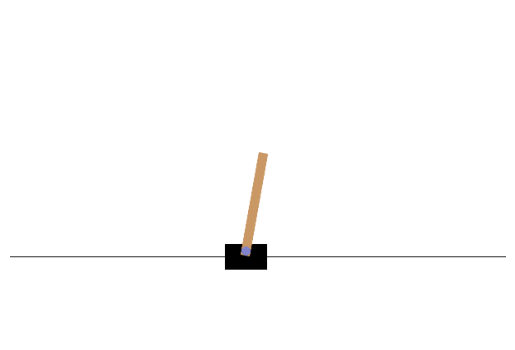

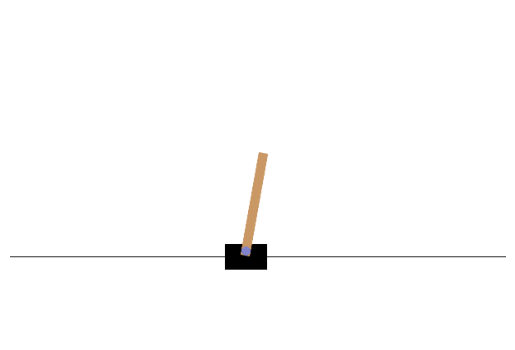

In [ ]:
for episode in range(5):
  done = False
  observation,_=env.reset()
  state= tf.convert_to_tensor([observation])
  while not done:
    frame=env.render()
    clear_output(wait=True)
    plt.imshow(frame)
    plt.axis('off')
    display(plt.gcf())
    action=policy(state);
    state,reward,terminated,truncated,info=env.step(action.numpy())
    done=terminated or truncated
    state=tf.convert_to_tensor([state])
env.close()